# TEXT MINING for PRACTICE
- 본 자료는 텍스트 마이닝을 활용한 연구 및 강의를 위한 목적으로 제작되었습니다.
- 본 자료를 강의 목적으로 활용하고자 하시는 경우 꼭 아래 메일주소로 연락주세요.
- 본 자료에 대한 허가되지 않은 배포를 금지합니다.
- 강의, 저작권, 출판, 특허, 공동저자에 관련해서는 문의 바랍니다.
- **Contact : 전병진(fingeredman@gmail.com)**

---

In [1]:
!ls

mecab-python-0.996  sample_data  teanaps


In [2]:
# TEANAPS (https://github.com/fingeredman/teanaps)
!git clone https://github.com/fingeredman/teanaps.git

fatal: destination path 'teanaps' already exists and is not an empty directory.


In [3]:
!ls

mecab-python-0.996  sample_data  teanaps


## WEEK 06-2. 단어 가중치를 활용해 워드클라우드 생성하기
- Python으로 문서에서 단어의 가중치를 활용해 워드클라우드를 생성하는 방법에 대해 다룹니다.

---

In [4]:
from teanaps.nlp.SyntaxAnalyzer import SyntaxAnalyzer

sa = SyntaxAnalyzer()

tokenized_sentence_list = []

PATH = "teanaps/data/article_sample.txt"
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")

for line in f:
    line = line.strip()
    col = line.split("\t")
    label = col[0]
    source = col[1]
    datetime = col[2]
    title = col[3]
    content = col[4]
    tagged_word_list = sa.parse(content)
    tokenized_sentence = ""
    for word, pos in tagged_word_list:
        if pos in POS_LIST:
            tokenized_sentence += " " + word
    tokenized_sentence_list.append(tokenized_sentence.strip())
f.close()

tokenized_sentence_list[:5]

['금융 비트코인 쇠락 재적 결함 보고서 넷 코리아 손 예술 기자 대표 암호 화폐 비트코인 가격 급 변동 불구 일부 암호 화폐 옹호 론자 비트코인 몇 가지 결함 해소 국면 것 예측 그 결함 전제 국내외 정부 감독 당국 선제 시각 및 규제 환경 정비 주장 한국 금융 연구원 비트코인 쇠락 재적 결함 보고서 암호 화폐 옹호 론 입장 그 제시 세 가지 결함 발표 여기 암호 화폐 옹호 론자 암호 화폐 부가 낼 수 사업 모델 등장 가능성 집중 인물 통칭 그 위해 비트코인 세 가지 결함 우선 해소 보고 하나 비트코인 재화 용역 구입 사용 시장 은 것 미국 비트코인 시장조사 기관 사토시 캐피탈 리서치 지난 기준 비트코인 사용 거래 결제 액 약 중국 알리페 위챗 페이 거래 결제 액 약 감안 시장 것 두 번 비트코인 거래 건수 급증 블록 용량 제한 등 채굴 통핸 결제 처리 지연 이용자 거래 완료 위해 부담 수료 문제 것 비트코인 기반 기술 블록 체인 구성 각 블록 용량 메가바이트 초당 평균 거래 처리 건수 건 약 개 블록 형성 반면 비자 경우 초당 거래 처리 건수 수 건 달 세 번 거래소 해킹 등 사기 거래 노출 점 지난 캐나다 암호 화폐 거래소 대표이사 이자 설립 사망 거액 고객 암호 화폐 분 시로 파산 보호 신청 파산관재인 은 비밀 키 관리 설립 사망 이전 개월 간 핫월렛 고객 암호 폐가 발표 핫월렛 인터넷 연결 암호 화폐 전자지갑 세 가지 결함 불구 비트코인 이용 오프라인 결제 나라 디지털 화폐 대한 실험 시도 상태 이 때문 암호 화폐 비트코인 정말 법정 통화 보완 거나 지급 결제 가치 저장 수단 역할 수 가늠 위해 선 재적 결함 대처 국내외 정부 감독 당국 암호 화폐 대한 시각 및 규제 환경 정비 게 이 보고서 의견 옹호 론 지적 세 가지 결함 중 일부 금융 소비자 투자 보호 문제 직결 상황 한국 금융 연구원 암호 화폐 수용 검토 정부 감독 당국 소비자 보호 강화 및 금융시장 안정 확보 관점 시장 참가자 정보 공시 의무 강화 결제 계좌 및 전자지갑 제공 거래소 금융 사의

In [0]:
# wordcloud 패키지를 불러옵니다.
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [0]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
for tokenized_sentence in tokenized_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
    # random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
    import random
    tag_sentence = tokenized_sentence.split(" ")
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

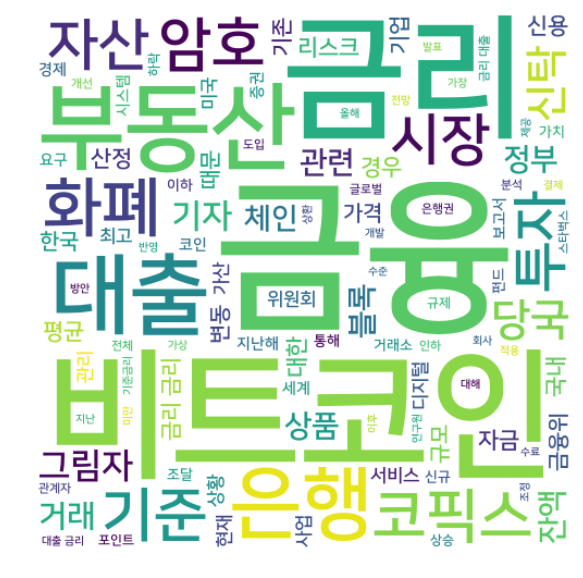

In [7]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path="teanaps/data/NanumSquareB.otf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()